# The machine learning part

It's time to use machine learning to create an algorithm that will automatically recognize the nature of the source of the seismic signal

In [1]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import catalog

catalog.display_parameters()

## Load the features

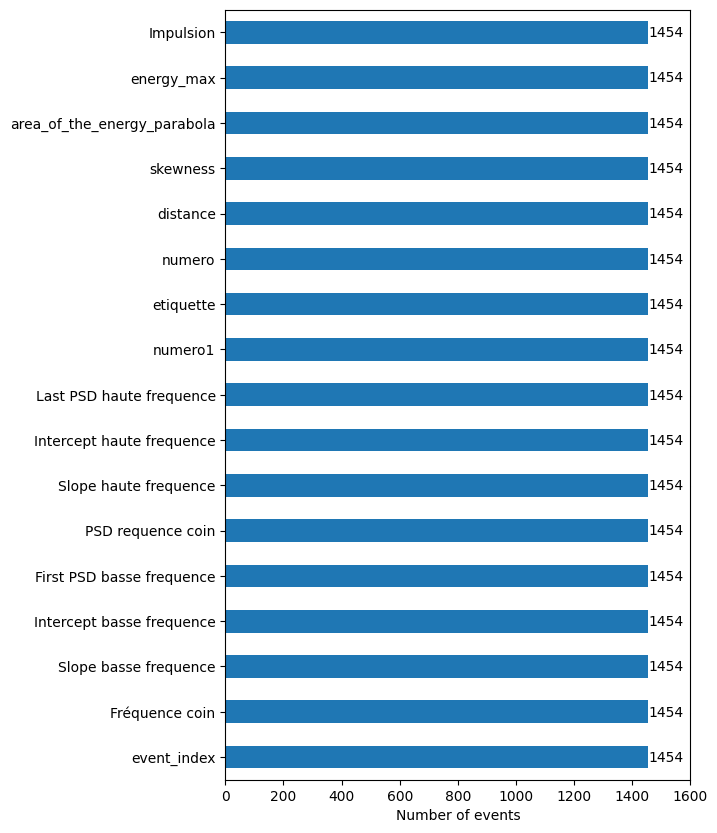

In [2]:
dataframe = catalog.load("features/all_features.pickle")

catalog.open_plot(dataframe, pos_number=0.1, xlim=1600)

## Create the algorithm

### Prepare datas

First, we need to define the data and the label

In [3]:
X = dataframe ## The data (all the features of the events)
y = dataframe["etiquette"] ## The label (the type of the events)

First, we'll just see if the algorithm can tell whether a seismic signal is produced by an earthquake or an other source.

In [4]:
processed_data = {}

for label_index, label in enumerate(dataframe["etiquette"]):
    if label == "earthquake":
        processed_data[label_index] = "earthquake"
    else:
        processed_data[label_index] = "not-earthquake"

## Convert dictionary to pandas series
Y = pd.Series(processed_data)

In [ ]:
colonne_inutile = ['numero1', 'numero', 'distance', 'event_index', 'Intercept basse frequence', 'Intercept haute frequence', 'PSD requence coin', 'Last PSD haute frequence']

X = X.drop(columns=colonne_inutile)

KeyError: "['etiquette_earthquake', 'etiquette_experimental explosion', 'etiquette_explosion', 'etiquette_ice quake', 'etiquette_landslide', 'etiquette_mine collapse', 'etiquette_mining explosion', 'etiquette_other event', 'etiquette_quarry blast'] not found in axis"

In [ ]:
X.head(0)

,Fréquence coin,Slope basse frequence,First PSD basse frequence,Slope haute frequence,skewness,area_of_the_energy_parabola,energy_max,Impulsion


### Divide data

The data will be divide in two sets. The first part will be used for training the algorithm and the second for testing the algorithm.

In [ ]:
## We divide the data in 50% for training and 50% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

### Train the algorithm

Let's use RandomForestClassifier for the algorithm.

In [ ]:
## Train 100 decision trees in random forest
model = RandomForestClassifier(n_estimators=100, random_state=0) ## Select the model and the parameters
model.fit(X_train, y_train) ## Train the model with the train set

RandomForestClassifier(random_state=0)

### Test the algorithm

Let's test the algorithm with the test set.

In [ ]:
y_pred = model.predict(X_test) ## Use the test set and generate prediction
print(classification_report(y_test, y_pred)) ## Compare prediction with the real label

                precision    recall  f1-score   support

    earthquake       0.93      0.62      0.74       247
not-earthquake       0.83      0.97      0.90       480

      accuracy                           0.85       727
     macro avg       0.88      0.80      0.82       727
  weighted avg       0.86      0.85      0.85       727



The model was very successful in classifying seismic signals from earthquakes and other sources.

In [ ]:
## Save the model
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']